In [2]:
library(MPV)
library(mixlm)

In [9]:
setwd(r"(C:\Users\GEOMATICA\Curso_suelo\02_Prediccion_Suelo_Multiespectral\Datos\Satelite\Sentinel2\Bandas)")

In [3]:
# Incluyendo los datos
dato_muestreo <- read.csv(r"(C:\Users\GEOMATICA\Curso_suelo\02_Prediccion_Suelo_Multiespectral\Datos\Tabla\Datos_Suelo.csv)",
                       sep = ";")

In [4]:
head(dato_muestreo,3)

,ID,ESTE,NORTE,pH,CE,MO,N,P,K,Ca,Mg,Al,CICe,BT,SAl,Arena,Limo,Arcilla
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,512538,9056311,4.32,1.20,1.48,0.07,27.91,0.21,0.26,0.02,1.9,2.38,0.48,79.69,62.9,16.16,20.94
2,2,512126,9057087,5.00,0.13,2.29,0.11,2.28,0.18,1.67,0.83,1.1,3.77,2.67,29.14,54.9,20.16,24.94
3,3,512766,9056489,4.58,0.16,1.61,0.08,3.68,0.16,0.17,0.04,2.1,2.47,0.37,85.09,62.9,16.16,20.94


In [7]:
datos_Suelo = dato_muestreo[,4:18]

In [8]:
name_suelo = names(datos_Suelo)
name_suelo

[1] "pH"      "CE"      "MO"      "N"       "P"       "K"       "Ca"     
 [8] "Mg"      "Al"      "CICe"    "BT"      "SAl"     "Arena"   "Limo"   
[15] "Arcilla"

In [10]:
carpeta_Prediccion = paste(getwd(),"/","Prediccion/",sep = "")
carpeta_Prediccion

[1] "C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/Prediccion/"

## Cambiar dato

In [11]:
x_suelo = name_suelo[1]
x_suelo

[1] "pH"

In [12]:
lista_datos <- list.files(path = carpeta_Prediccion, pattern = paste("*Modelo_prediccion_*",x_suelo,"*.csv$",sep = ""))
lista_datos

[1] "Modelo_prediccion_pH.csv"

In [13]:
paste(carpeta_Prediccion,"/", lista_datos[1],sep = "")

[1] "C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/Prediccion//Modelo_prediccion_pH.csv"

In [14]:
datos_csv <- read.delim(paste(carpeta_Prediccion,"/", lista_datos[1],sep = ""),sep = ",")
datos_csv

X,Estimate,Std..Error,t.value,Pr...t..
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
S2_01_B1(),8.061165e+01,2.400649e+01,3.357911,1.606035e-03
S2_02_B2,6.395323e+07,1.741351e+07,3.672623,6.352295e-04
S2_04_B4,-6.395268e+07,1.741350e+07,-3.672592,6.352873e-04
S2_05_B5,2.350913e+02,6.138901e+01,3.829534,3.947144e-04
S2_06_B6,3.756518e+01,8.985874e+00,4.180471,1.324233e-04
S2_10_B11,4.445986e+02,1.239641e+02,3.586510,8.217844e-04
S2_11_B12,4.663607e+02,1.259937e+02,3.701460,5.824058e-04
S2_26_CIVE,-1.538252e+01,4.141078e+00,-3.714618,5.597331e-04
S2_14_ExR,4.568066e+07,1.243822e+07,3.672606,6.352617e-04


In [15]:
datos_csv[,1]

[1] "S2_01_B1()"   "S2_02_B2"     "S2_04_B4"     "S2_05_B5"     "S2_06_B6"    
 [6] "S2_10_B11"    "S2_11_B12"    "S2_26_CIVE"   "S2_14_ExR"    "S2_15_ExB"   
[11] "S2_16_IKAW"   "S2_45_MDE"    "S2_48_TPI"    "S2_51__ACP_1" "S2_52__ACP_2"

In [16]:
substring(datos_csv[,1][1], first = 1, last = nchar(datos_csv[,1][1])-2)

[1] "S2_01_B1"

In [17]:
# Cambiar el nombre primer elemento
datos_csv[,1][1] = substring(datos_csv[,1][1], first = 1, last =nchar(datos_csv[,1][1])-2)

In [18]:
Variables = datos_csv[,1]

In [19]:
length(Variables)

[1] 15

In [20]:
Variables[1]

[1] "S2_01_B1"

In [21]:
lista_bandas = c()

In [22]:
getwd()

[1] "C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas"

In [24]:
Carpeta_select <- paste(path = getwd(), "/Banda_select/",sep = "")
Carpeta_select

[1] "C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/Banda_select/"

In [25]:
pattern = paste("S2_",Variables[1],".tif",sep = "")
pattern

[1] "S2_S2_01_B1.tif"

In [26]:
Variables

[1] "S2_01_B1"     "S2_02_B2"     "S2_04_B4"     "S2_05_B5"     "S2_06_B6"    
 [6] "S2_10_B11"    "S2_11_B12"    "S2_26_CIVE"   "S2_14_ExR"    "S2_15_ExB"   
[11] "S2_16_IKAW"   "S2_45_MDE"    "S2_48_TPI"    "S2_51__ACP_1" "S2_52__ACP_2"

In [29]:
library(sp)
library(raster)

In [30]:
for (i in 1:length(Variables)) {
    name_variable = Variables[i]
    ubica_variable <- paste(Variables[i],".tif",sep = "")
    selec_b <- raster(ubica_variable[1])
    lista_bandas[[i]] <- selec_b
}

In [31]:
RGB = stack(lista_bandas)

In [32]:
Variables

[1] "S2_01_B1"     "S2_02_B2"     "S2_04_B4"     "S2_05_B5"     "S2_06_B6"    
 [6] "S2_10_B11"    "S2_11_B12"    "S2_26_CIVE"   "S2_14_ExR"    "S2_15_ExB"   
[11] "S2_16_IKAW"   "S2_45_MDE"    "S2_48_TPI"    "S2_51__ACP_1" "S2_52__ACP_2"

In [33]:
names(RGB) = Variables

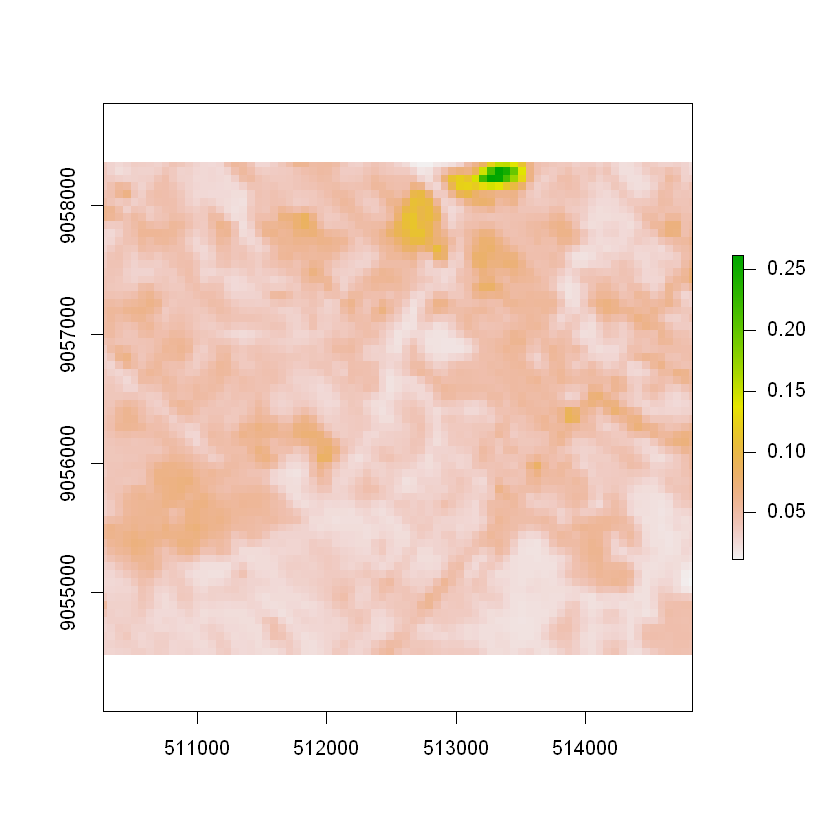

In [34]:
plot(RGB[[1]])

In [35]:
estimadores = datos_csv[,2]

In [36]:
estimadores

[1]  8.061165e+01  6.395323e+07 -6.395268e+07  2.350913e+02  3.756518e+01
 [6]  4.445986e+02  4.663607e+02 -1.538252e+01  4.568066e+07 -4.568079e+07
[11]  3.401823e+00  3.377727e-02 -5.872366e-01 -5.057964e+02 -5.676132e+02

In [37]:
length(estimadores)

[1] 15

In [38]:
Prediccion_variable = estimadores[1]*RGB[[1]]+estimadores[2]*RGB[[2]]+estimadores[3]*RGB[[3]]+  estimadores[4]*RGB[[4]]+estimadores[5]*RGB[[5]]+estimadores[6]*RGB[[6]]+ estimadores[7]*RGB[[7]]+estimadores[8]*RGB[[8]]+estimadores[9]*RGB[[9]]+estimadores[10]*RGB[[10]]+estimadores[11]*RGB[[11]]+estimadores[12]*RGB[[12]]+estimadores[13]*RGB[[13]]+estimadores[14]*RGB[[14]]+estimadores[15]*RGB[[15]]

In [39]:
#+estimadores[2]*RGB[[2]]+estimadores[3]*RGB[[3]]+  estimadores[4]*RGB[[4]]+estimadores[5]*RGB[[5]]+estimadores[6]*RGB[[6]]+ estimadores[7]*RGB[[7]]+estimadores[8]*RGB[[8]]+estimadores[9]*RGB[[9]]+estimadores[10]*RGB[[10]]+estimadores[11]*RGB[[11]]+estimadores[12]*RGB[[12]]

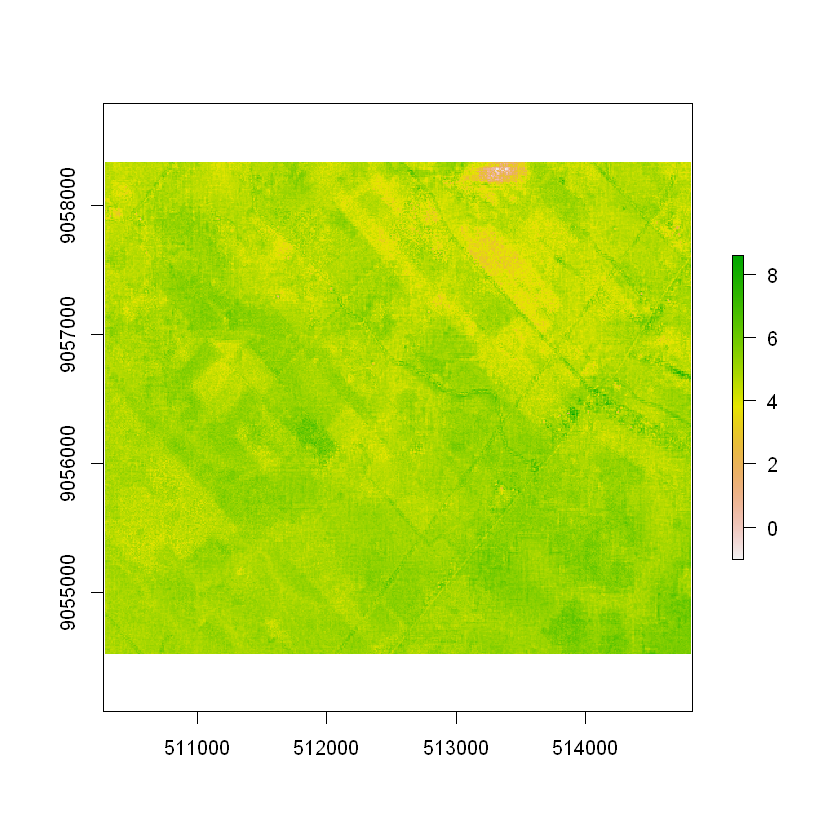

In [40]:
plot(Prediccion_variable)

In [42]:
EEA_Campo = shapefile(r"(C:\Users\GEOMATICA\Curso_suelo\02_Prediccion_Suelo_Multiespectral\Datos\Shp\CE_Campo_Verde.shp)")

In [45]:
library(sf)

In [46]:
EEA_Campo_buffer <- st_buffer(st_geometry(st_as_sf(EEA_Campo)), dist = 30)

In [47]:
EEA_Campo_buffer_sp = as(EEA_Campo_buffer, Class = "Spatial")

In [48]:
Prediccion_variable_clip = mask(Prediccion_variable, EEA_Campo_buffer_sp)

In [49]:
carpeta_Raster_prediccion = paste(getwd(),"/","RASTER_PREDICCION",sep = "")
    if (!dir.exists(carpeta_Raster_prediccion)){
        dir.create(carpeta_Raster_prediccion)
    }else{
        print("Directorio existe RASTER_PREDICCION")
    }

In [50]:
name_prediccion_tif = paste(carpeta_Raster_prediccion,"/Prediccion_",x_suelo,".tif",sep = "")
name_prediccion_tif

[1] "C:/Users/GEOMATICA/Curso_suelo/02_Prediccion_Suelo_Multiespectral/Datos/Satelite/Sentinel2/Bandas/RASTER_PREDICCION/Prediccion_pH.tif"

In [51]:
writeRaster(Prediccion_variable_clip, name_prediccion_tif, drivername="Gtiff",overwrite=TRUE)

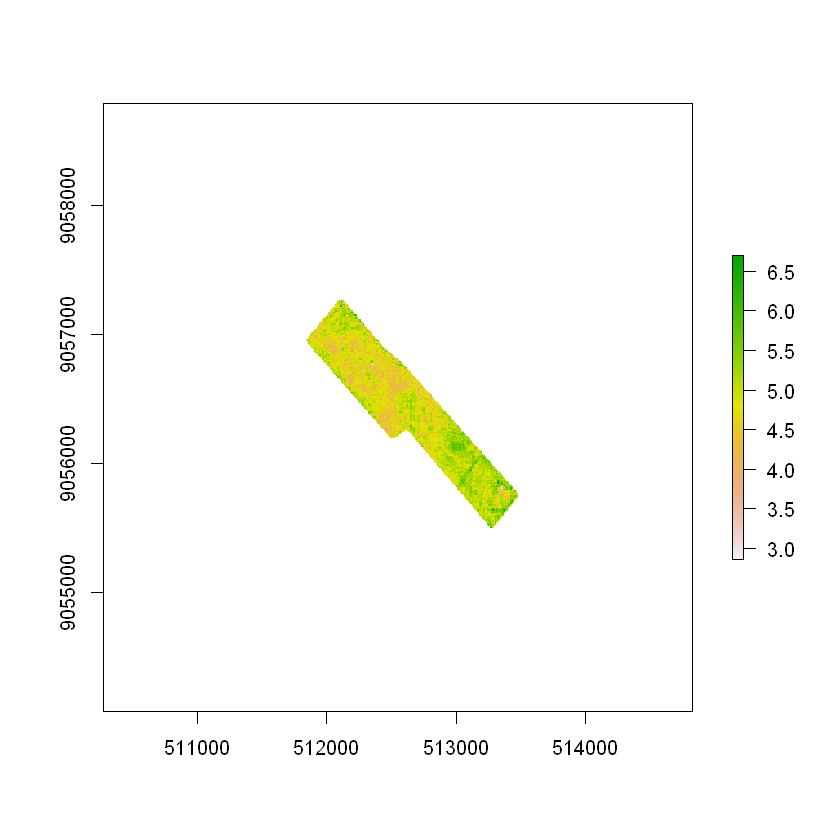

In [52]:
plot(Prediccion_variable_clip)